<center><img src="https://upload.wikimedia.org/wikipedia/commons/8/89/TheNorthFace_logo.svg" alt="THE NORTH FACE LOGO" width="25%" />

# The North Face e-commerce : boosting online sales !


## <ins>Context</ins>

The North Face brand would like to take advantage of machine learning solutions to boost online sales on the website : https://www.thenorthface.fr/

We are working with a corpus of product descriptions 

## 1 - Loading and Preprocessing

### 1.1 - Import modules and load the dataset

In [1]:
print("Installing Spacy...")
!pip install spacy -q
print("...Installed!")
print("Importing libraries...")
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_sm -q
import en_core_web_sm
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
!pip install wordcloud -q
import wordcloud
import random
print("...Done!")

Installing Spacy...
...Installed!
Importing libraries...
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
...Done!


In [2]:
class bcolors:
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'

In [3]:
catalog = pd.read_csv("src/sample-data.csv")

In [4]:
print(f"The dataset contains {catalog.shape[0]} product SKUs.")

The dataset contains 500 product SKUs.


In [5]:
catalog.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


### 1.2 - Preprocessing

In [6]:
# Drop the id column
#catalog.drop(columns=["id"],inplace=True)

In [7]:
catalog

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."
...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...


In [8]:
catalog["clean_documents"] =  catalog['description'].fillna('').apply(lambda x: x.lower())

catalog["clean_documents"] = catalog["clean_documents"].\
    apply(lambda x : 
    x.replace("<li>",'')\
    .replace("</li>",'')\
    .replace("<br>",'')\
    .replace("</br>",'')\
    .replace("<b>",'')\
    .replace("</b>",'')\
    .replace("<ul>",'')\
    .replace("</ul>",''))
                      
catalog["clean_documents"] = catalog["clean_documents"].str.replace(r"[^A-Za-z0-9]+", " ")

    
catalog.head()

/tmp/ipykernel_54/3212848613.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  catalog["clean_documents"] = catalog["clean_documents"].str.replace(r"[^A-Za-z0-9]+", " ")


,id,description,clean_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...


In [9]:
# catalog["clean_documents"][0]

In [10]:
nlp = en_core_web_sm.load()

In [11]:
catalog["tokenized_documents"] = catalog["clean_documents"]\
                        .fillna('')\
                        .apply(lambda x : [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])
catalog.head()

,id,description,clean_documents,tokenized_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a..."


In [12]:
catalog["nlp_ready"] = catalog["tokenized_documents"].apply(lambda x : (' '.join(x)).strip())
catalog.head()
#catalog.reset_index(inplace=True)

,id,description,clean_documents,tokenized_documents,nlp_ready
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


### 1.3 - TF-IDF Encoding

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(catalog['nlp_ready'])

dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
vectorizer.vocabulary_

{'active': 319,
 'classic': 813,
 'boxer': 630,
 'reason': 2743,
 'cult': 1030,
 'favorite': 1407,
 'cool': 953,
 'especially': 1334,
 'sticky': 3273,
 'situation': 3091,
 'quick': 2701,
 'dry': 1219,
 'lightweight': 2057,
 'underwear': 3665,
 'minimal': 2233,
 'space': 3194,
 'travel': 3582,
 'pack': 2445,
 'expose': 1366,
 'brush': 661,
 'waistband': 3788,
 'offer': 2383,
 'skin': 3103,
 'softness': 3173,
 'panel': 2463,
 'construction': 930,
 'traditional': 3566,
 'fit': 1453,
 'functional': 1562,
 'fly': 1497,
 'oz': 2442,
 '100': 3,
 'recycle': 2752,
 'polyester': 2593,
 'moisture': 2258,
 'wicke': 3867,
 'performance': 2517,
 'inseam': 1880,
 'size': 3092,
 'recyclable': 2751,
 'common': 886,
 'thread': 3499,
 'program': 2650,
 'silky': 3070,
 'capilene': 719,
 'fabric': 1383,
 'ultralight': 3645,
 'breathable': 639,
 'elastic': 1266,
 'comfort': 876,
 'gladiodor': 1605,
 'natural': 2307,
 'odor': 2382,
 'control': 944,
 'garment': 1577,
 'programweight': 2652,
 '99': 294,
 'mexi

## 2 - Identify similar products

### 2.1 - DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.6, min_samples=2, metric="cosine")
dbscan.fit(X)
clusters = np.unique(dbscan.labels_)
print("DBSCAN created {} Clusters : {} ".format(len(clusters),clusters))

DBSCAN created 71 Clusters : [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] 


Let's see if we can get a better number of clusters by iterating over **eps** and **min_samples**

In [16]:
# Test of values for eps and min_samples
def count_val(val,T):
    c = 0
    for i in T:
        if i == val:
            c += 1
    return c

In [17]:
T_eps = np.arange(0.4,0.71,0.01)
T_min_samples = list(range(2,10))

for i in T_eps:
    for j in T_min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j, metric="cosine")
        dbscan.fit(X)
        clusters = np.unique(dbscan.labels_)
        label = list(dbscan.labels_)
        outliers_percent = count_val(-1,label)/len(label)*100
        
        print(f"eps = {round(i,3)} - min_samples = {j} | {round(outliers_percent,2)}% outliers ({count_val(-1,label)}) ")
        print(f"{len(clusters)} clusters created")
        print("-"*50)

eps = 0.4 - min_samples = 2 | 45.0% outliers (225) 
91 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 3 | 69.0% outliers (345) 
31 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 4 | 75.8% outliers (379) 
21 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 5 | 83.2% outliers (416) 
12 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 6 | 87.2% outliers (436) 
9 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 7 | 89.6% outliers (448) 
7 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 8 | 95.4% outliers (477) 
3 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 9 | 97.0% outliers (485) 
2 clusters created
--------------------------------------------------
eps = 0.41 - min_sam

We can see here that we can get 17 clusters with only ~7% outliers by selecting eps = 0.7 and min_samples = 3. Let's work with these values from now on.

In [18]:
dbscan = DBSCAN(eps=0.7, min_samples=3, metric="cosine")
dbscan.fit(X)
clusters = np.unique(dbscan.labels_)
print("DBSCAN created {} Clusters : {} ".format(len(clusters),clusters))

DBSCAN created 18 Clusters : [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 


In [19]:
catalog["dbscan_cluster"] = dbscan.labels_
catalog.head()

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,0
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,0
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,1


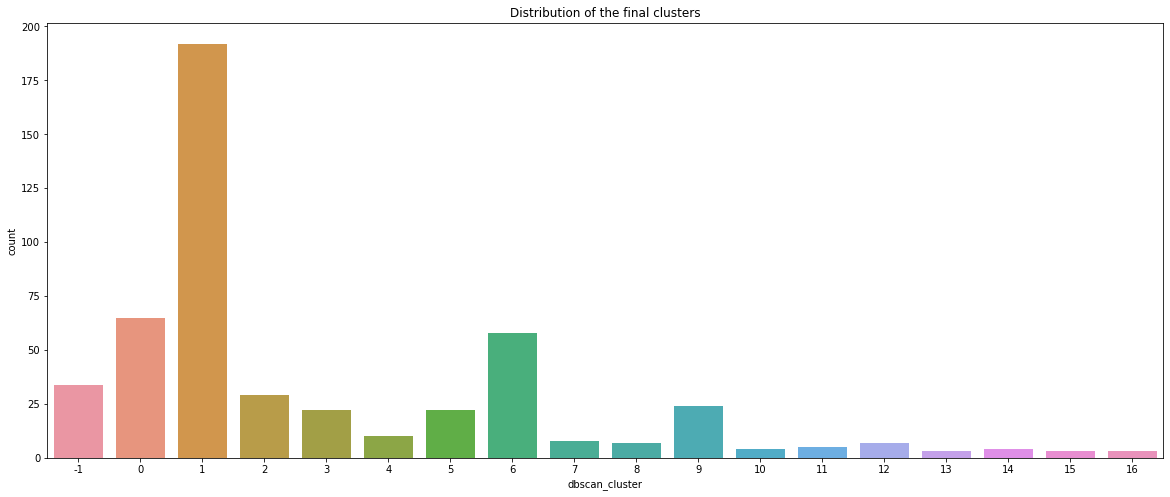

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(data=catalog,x="dbscan_cluster")
plt.title("Distribution of the final clusters")
plt.show()

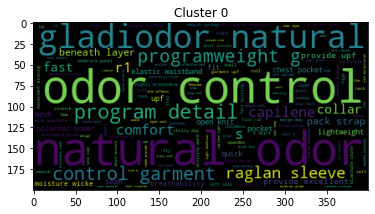

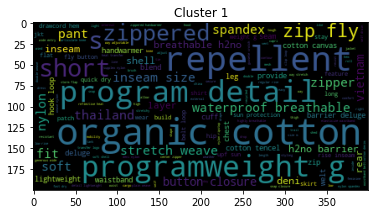

In [21]:
# Wordcloud for each cluster
for c in clusters[1:3]:
    sub_cat = catalog.query(f"dbscan_cluster == {c}")
    corpus = " ".join([str(item) for item in sub_cat["nlp_ready"].to_list()])
    doc = nlp(corpus)
    
    # Delete the most common words
    lemma_corpus = [token.lemma_ for token in doc]
    lemmadf = pd.Series(lemma_corpus)
    x = pd.DataFrame(lemmadf.value_counts()).reset_index()
    x["percent"] = x[0] / sum(x[0]) * 100
    common = x["percent"] > 1.0
    common = x[common]
    stop_words = list(common["index"])
    stop_words_v2 = list(STOP_WORDS) + stop_words
    
    
    wd = wordcloud.WordCloud(stopwords=stop_words_v2)
    cloud = wd.generate(doc.text)
    # Show with matplotlib 
    plt.imshow(cloud)
    plt.title(f"Cluster {c}")
    plt.show()

### 2.2 - KMeans

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [23]:
wcss =  []
k = []
sil = []
N = 50

for i in range (2,N+1): 
    kmeans = KMeans(n_clusters= i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)

In [24]:
kmeans = pd.DataFrame({"k":k,"wcss":wcss,"sil":sil})

In [25]:
fig = px.line(kmeans, x="k", y="wcss",markers=True)
fig.update_traces(textposition="bottom right")
fig.show(renderer="iframe") # if using workspace

In [26]:
fig = px.bar(data_frame=kmeans, x=k, y=sil)

fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

fig.show(renderer="iframe") # if using workspace

We can definitely choose $K = 19$ for our clustering.

In [27]:
kmeans = KMeans(n_clusters= 19, random_state = 42)

In [28]:
kmeans.fit(X)

KMeans(n_clusters=19, random_state=42)

In [29]:
catalog["kmeans_cluster"] = kmeans.labels_

In [30]:
catalog.head()

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster,kmeans_cluster
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,0,14
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,0,15
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,0,15
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,1,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,1,1


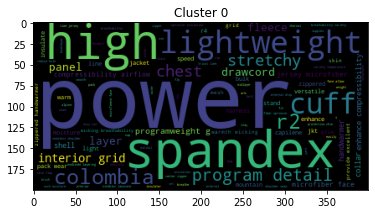

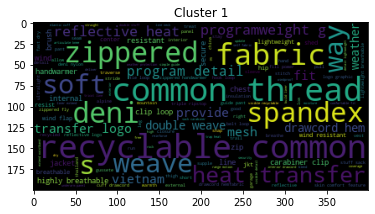

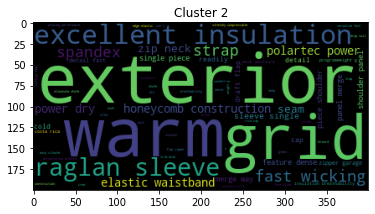

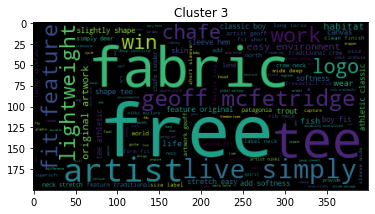

In [31]:
# Wordcloud for each cluster
for c in clusters[1:5]:
    sub_cat = catalog.query(f"kmeans_cluster == {c}")
    corpus = " ".join([str(item) for item in sub_cat["nlp_ready"].to_list()])
    doc = nlp(corpus)
    
    # Delete the most common words
    lemma_corpus = [token.lemma_ for token in doc]
    lemmadf = pd.Series(lemma_corpus)
    x = pd.DataFrame(lemmadf.value_counts()).reset_index()
    x["percent"] = x[0] / sum(x[0]) * 100
    common = x["percent"] > 1.0
    common = x[common]
    stop_words = list(common["index"])
    stop_words_v2 = list(STOP_WORDS) + stop_words
    
    
    wd = wordcloud.WordCloud(stopwords=stop_words_v2)
    cloud = wd.generate(doc.text)
    # Show with matplotlib 
    plt.imshow(cloud)
    plt.title(f"Cluster {c}")
    plt.show()

## 3 - Recommender system

Now, we use the clusters created from part 1 to build a recommender system. The aim is to be able to suggest to a user some products that are similar to the ones he is interested in. To do this, we consider that products belonging to the same cluster are similar.

In [32]:
catalog.tail()

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster,kmeans_cluster
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms cut loose from the maddening cro...,"[cap, 2, bottom, cut, loose, madden, crowd, se...",cap 2 bottom cut loose madden crowd search und...,0,10
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew this crew takes the edge off fickle...,"[cap, 2, crew, crew, take, edge, fickle, weath...",cap 2 crew crew take edge fickle weather clear...,0,10
497,498,All-time shell - No need to use that morning T...,all time shell no need to use that morning tim...,"[time, shell, need, use, morning, time, umbrel...",time shell need use morning time umbrella time...,1,6
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,all wear cargo shorts all wear cargo shorts ba...,"[wear, cargo, short, wear, cargo, short, bask,...",wear cargo short wear cargo short bask glory s...,1,5
499,500,All-wear shorts - Time to simplify? Our All-We...,all wear shorts time to simplify our all wear ...,"[wear, short, time, simplify, wear, short, pro...",wear short time simplify wear short prove shor...,1,5


In [33]:
def find_similar_items(product_id):
    """
    Return 5 product ids belonging to the same cluster as item_id
    """
    cluster_id = int(catalog.loc[catalog["id"] == product_id,'dbscan_cluster'])
    similar_items = catalog.loc[catalog["dbscan_cluster"] == cluster_id,:].loc[catalog["id"] != product_id,:]["id"]
    sample = similar_items.sample(min(5,len(similar_items))) # security if 5 is greater than the max
    return sample

In [34]:
# Test
N_tests = 3
product_ids = []
for i in range(N_tests):
    n = random.randint(1,500)
    product_ids.append(n)

for product_id in product_ids:
    print(f"You chose the product {product_id}. You might like these ones : {find_similar_items(product_id)}")

You chose the product 67. You might like these ones : 84      85
296    297
142    143
323    324
462    463
Name: id, dtype: int64
You chose the product 331. You might like these ones : 304    305
258    259
305    306
84      85
249    250
Name: id, dtype: int64
You chose the product 335. You might like these ones : 57      58
238    239
64      65
490    491
333    334
Name: id, dtype: int64


Everything seems to work just fine. Let's build our recommandation system now ! 🔮

In [35]:
def reco_system():
    product_id = int(input("What product would you like to buy ? "))

    print()
    try:
        item_desc = catalog.loc[catalog['id']==product_id, 'clean_documents'].values[0]
    except:
        print('Product not found in database. Please enter a valid product id.')
    else:
        print(f"{bcolors.OKBLUE}Product found in database, description below :")
        print(item_desc)
        print()

        print(f"{bcolors.OKCYAN}You might also be interested by the following products : ")
        print()

        for i in find_similar_items(product_id):
            print(f"{bcolors.OKCYAN}Item #", i)
            print(catalog.loc[catalog['id']==i, 'clean_documents'].values[0])
            print('-'*50)

In [36]:
reco_system()

What product would you like to buy ?  2



Product found in database, description below :
active sport boxer briefs skinning up glory requires enough movement without your boxers deciding to poach their own route the form fitting active sport boxer briefs are made from breathable 93 polyester 71 recycled fabric that s fast wicking dries quickly and has 7 spandex for stretch the seamless waistband and soft leg edges won t roll or bind the gusseted flat sewn 6 inseam size m is offset to prevent inner thigh chafe fly free with a smooth front panel recyclable through the common threads recycling program details stretch mesh provides support open weave mesh for airflow wicks efficiently dries fast seamless construction flat sewn gusseted inseam is set forward to prevent inner thigh chafe fly free support inseam size m is 6 fabric 4 6 oz 93 polyester 71 recycled 7 spandex with moisture wicking performance recyclable through the common threads recycling program weight 60 g 2 1 oz made in israel 

You might also be interested by the f

## 4 - Topic modeling

Latent Semantic Analysis, or LSA, is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix.

In [37]:
X

<500x3940 sparse matrix of type '<class 'numpy.float64'>'
	with 34934 stored elements in Compressed Sparse Row format>

In [44]:
svd_model = TruncatedSVD(n_components=15, algorithm='randomized',random_state=122)
lsa = svd_model.fit_transform(X)

topic_encoded_df = pd.DataFrame(lsa, columns = [f"topic_{i}" for i in range(len(lsa[0]))])
topic_encoded_df["documents"] = catalog['clean_documents']

topic_encoded_df.head(3)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,documents
0,0.275655,-0.044397,0.188808,0.078546,-0.126149,-0.007022,-0.043477,-0.019656,-0.147303,0.016371,0.006548,0.060137,-0.030682,0.030606,-0.035508,active classic boxers there s a reason why our...
1,0.279515,-0.068687,0.107608,0.095795,-0.028671,0.091703,-0.034345,-0.022467,-0.107231,-0.068916,-0.019007,0.180807,0.024681,0.076766,0.042133,active sport boxer briefs skinning up glory re...
2,0.257634,-0.084977,0.104014,0.024622,-0.027324,0.092595,0.013560,0.050475,-0.026227,-0.024192,-0.028411,0.199983,0.076926,0.074552,0.035700,active sport briefs these superbreathable no f...


Contrary to clustering, LSA allows to map each document to a mixing of several topics. For this reason, it's a bit more difficult to interpret the topics as categories : one document can actually be related to several topics at a time. To make things easier, we can extract the main topic of each document.

In [45]:
topic_encoded_df["main_topic"] = [np.argmax(topic) for topic in lsa]
topic_encoded_df["main_topic"].value_counts()

0     262
1      61
2      37
7      25
5      25
8      19
3      16
12     12
6      11
10      8
14      8
11      6
4       5
9       4
13      1
Name: main_topic, dtype: int64

<AxesSubplot:xlabel='main_topic', ylabel='count'>

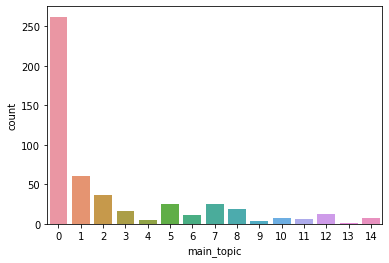

In [48]:
sns.countplot(data=topic_encoded_df,x="main_topic")

 We can see that the topic_0 is the most represented counting for more than 50% of all the documents.

In [54]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,000,03,10,100,1000,1021,1027,103,1038,1055,...,zinger,zip,zipped,zipper,zippered,zippers,zippersfabric,zipping,zips,zone
topic_0,0.002575,0.000567,0.050282,0.133324,0.000402,0.000338,0.000258,0.010804,0.000435,0.000206,...,0.000642,0.087075,0.000958,0.077680,0.083723,0.000530,0.000884,0.001815,0.002247,0.007462
topic_1,0.000383,0.000715,0.007205,0.059102,0.000435,0.000442,0.000265,0.021141,0.000570,0.000277,...,0.000780,0.055554,0.001070,0.089999,0.088311,0.000883,0.001223,0.002584,0.002144,0.010993
topic_2,0.001377,0.000717,0.043832,0.015058,0.000419,0.000339,0.000122,0.000019,0.000558,0.000116,...,0.000805,0.064435,0.000388,0.041367,0.072252,0.000805,0.000933,0.001879,0.002693,0.001522
topic_3,0.003954,0.001354,0.087526,0.056210,0.001084,0.000640,0.000100,0.004690,0.001229,0.000218,...,0.000803,0.074092,0.000990,0.118822,0.063419,0.001261,0.002161,0.004948,0.004113,0.016607
topic_4,0.002142,0.000381,0.011620,0.060573,0.000420,0.000073,0.000018,0.001052,0.000294,0.000264,...,0.000344,0.021398,0.000031,0.006733,0.007397,0.000348,0.000539,0.000670,0.000045,0.019769


In [63]:
print("Let's see what the topics are formed of. \n")

for i,row in topics_description.iterrows():
    print(f"Topic {i}")
    print(row.sort_values(ascending=False)[0:5].index.tolist())
    print()

Let's see what the topics are formed of. 

Topic topic_0
['recycle', 'pocket', 'oz', 'organic', 'cotton']

Topic topic_1
['organic', 'shirt', 'cotton', 'ringspun', 'print']

Topic topic_2
['merino', 'odor', 'pocket', 'wool', 'control']

Topic topic_3
['organic', 'inseam', 'cotton', 'button', '32']

Topic topic_4
['merino', 'wool', 'wash', 'sun', 'capilene']

Topic topic_5
['nylon', '82', 'coverage', '18', 'sun']

Topic topic_6
['82', 'pocket', '18', 'coverage', 'cotton']

Topic topic_7
['strap', 'waterproof', 'barrier', 'h2no', 'deni']

Topic topic_8
['sun', 'upf', 'protection', '30', 'collar']

Topic topic_9
['fleece', 'waterproof', 'barrier', 'strap', 'h2no']

Topic topic_10
['photo', 'poster', 'outside', 'fleece', 'excited']

Topic topic_11
['82', '18', 'coverage', 'microfiber', 'waist']

Topic topic_12
['fleece', 'r1', 'dwr', 'weave', 'tencel']

Topic topic_13
['fleece', 'heat', 'reflective', 'transfer', 'logo']

Topic topic_14
['microfiber', 'toe', 'knit', 'sock', 'construction']


In [65]:
topic_encoded_df.columns

Index(['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'documents', 'main_topic'],
      dtype='object')

In [72]:
topic_encoded_df["main_topic"]

0      0
1      0
2      0
3      0
4      0
      ..
495    2
496    2
497    0
498    3
499    0
Name: main_topic, Length: 500, dtype: int64

-------------------------

TOPIC :  topic_0


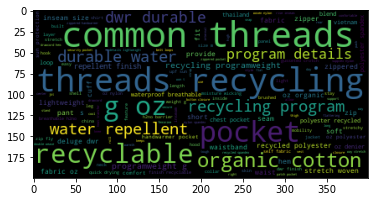


-------------------------

TOPIC :  topic_1


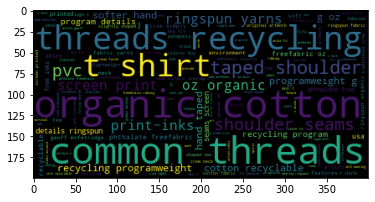


-------------------------

TOPIC :  topic_2


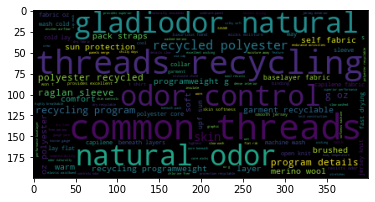


-------------------------

TOPIC :  topic_3


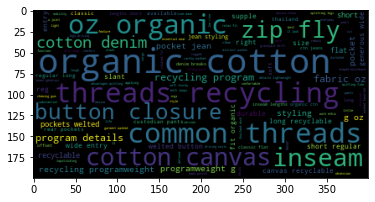


-------------------------

TOPIC :  topic_4


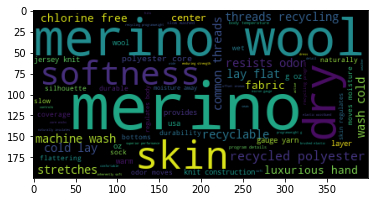


-------------------------

TOPIC :  topic_5


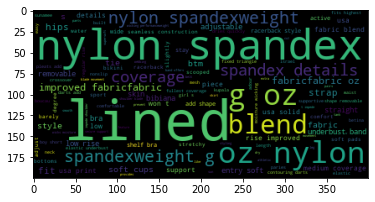


-------------------------

TOPIC :  topic_6


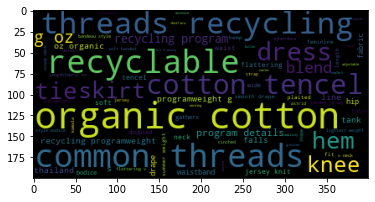


-------------------------

TOPIC :  topic_7


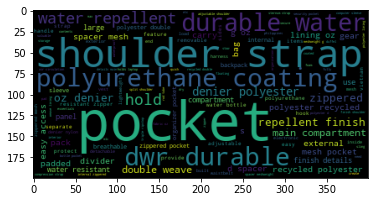


-------------------------

TOPIC :  topic_8


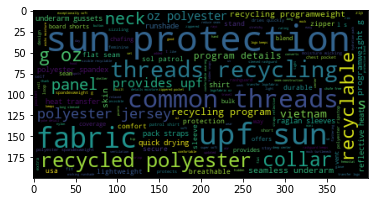


-------------------------

TOPIC :  topic_9


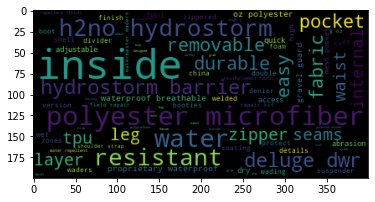


-------------------------

TOPIC :  topic_10


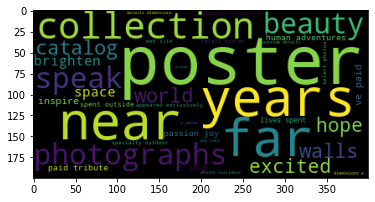


-------------------------

TOPIC :  topic_11


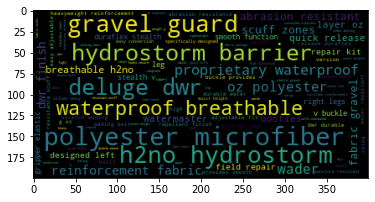


-------------------------

TOPIC :  topic_12


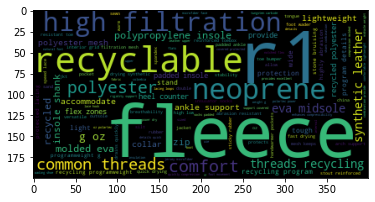


-------------------------

TOPIC :  topic_13


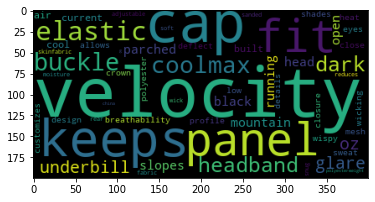


-------------------------

TOPIC :  topic_14


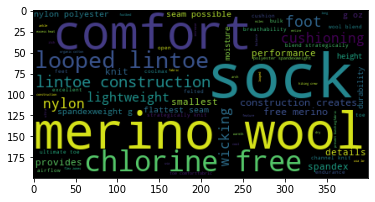

In [75]:
# Loop over each topic and create wordcloud from documents that are related to this main topic
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)

cols = [f'topic_{i}' for i in range(len(lsa[0]))]

for i in range(len(cols)):
    print('-------------------------')
    print()
    print('TOPIC : ', cols[i])
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['main_topic']==i).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==i,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()

## Conclusion

It is somehow difficult to strictly compare Clustering algorithm and LSA in the context of NLP data. The clustering is about referring a corpus to a specific category whereas LSA seeks a form of "comprehension" of the text by describing it with the most effective words algorithm-wise.

Nethertheless, we can observe that both algorithms identified a group of documents or topic related to sun protection, organic cotton or merino wood.